In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [27]:
df = pd.read_csv("jan&tobi.csv")
df[["Material type", "Position type", "Package type", "Lead type", "Lead_type_number", "Pitch", "Subtype", "L", "W", "T", "Missing", "defect_rate_ppm"]]

,Material type,Position type,Package type,Lead type,Lead_type_number,Pitch,Subtype,L,W,T,Missing,defect_rate_ppm
0,C,D,XD,R,2,X,R,16,9,5,1,8251.298294
1,C,D,XD,R,2,X,R,16,9,5,0,4198.417617
2,C,D,XD,R,2,X,R,16,9,5,0,541.225107
3,C,D,XD,R,2,X,R,16,9,5,0,223.074589
4,C,D,XD,R,2,X,R,16,9,5,0,165.536730
...,...,...,...,...,...,...,...,...,...,...,...,...
6748,P,B,GA,B,320,P,X,190,190,20,0,4065.040650
6749,M,X,XC,N,1,X,T,38,22,23,0,2083.333333
6750,P,D,SO,G,4,F,X,28,44,21,0,55555.555556
6751,M,X,XH,N,5,X,X,300,102,29,0,250000.000000


In [17]:
df_test = df[["Material type", "Position type", "Package type", "Lead type", "Lead_type_number", "Pitch", "Subtype", "L", "W", "T", "Missing", "defect_rate_ppm"]]
df_test = df_test[df_test["Missing"] == 1]
df_test

,Material type,Position type,Package type,Lead type,Lead_type_number,Pitch,Subtype,L,W,T,Missing,defect_rate_ppm
0,C,D,XD,R,2,X,R,16,9,5,1,8251.298294
22,P,D,SO,G,3,X,T,29,13,10,1,2314.025430
41,P,S,XS,F,4,X,P,63,83,71,1,13998.282419
55,C,D,XD,R,2,X,R,10,5,4,1,1295.510386
77,C,D,XD,R,2,X,R,16,8,5,1,820.157994
...,...,...,...,...,...,...,...,...,...,...,...,...
6732,P,D,SO,N,7,F,X,49,59,10,1,25000.000000
6734,P,D,SO,N,6,N,X,20,20,8,1,16666.666667
6744,X,D,XD,N,2,X,I,60,60,28,1,2415.458937
6745,X,D,XD,N,2,X,I,60,60,50,1,250000.000000


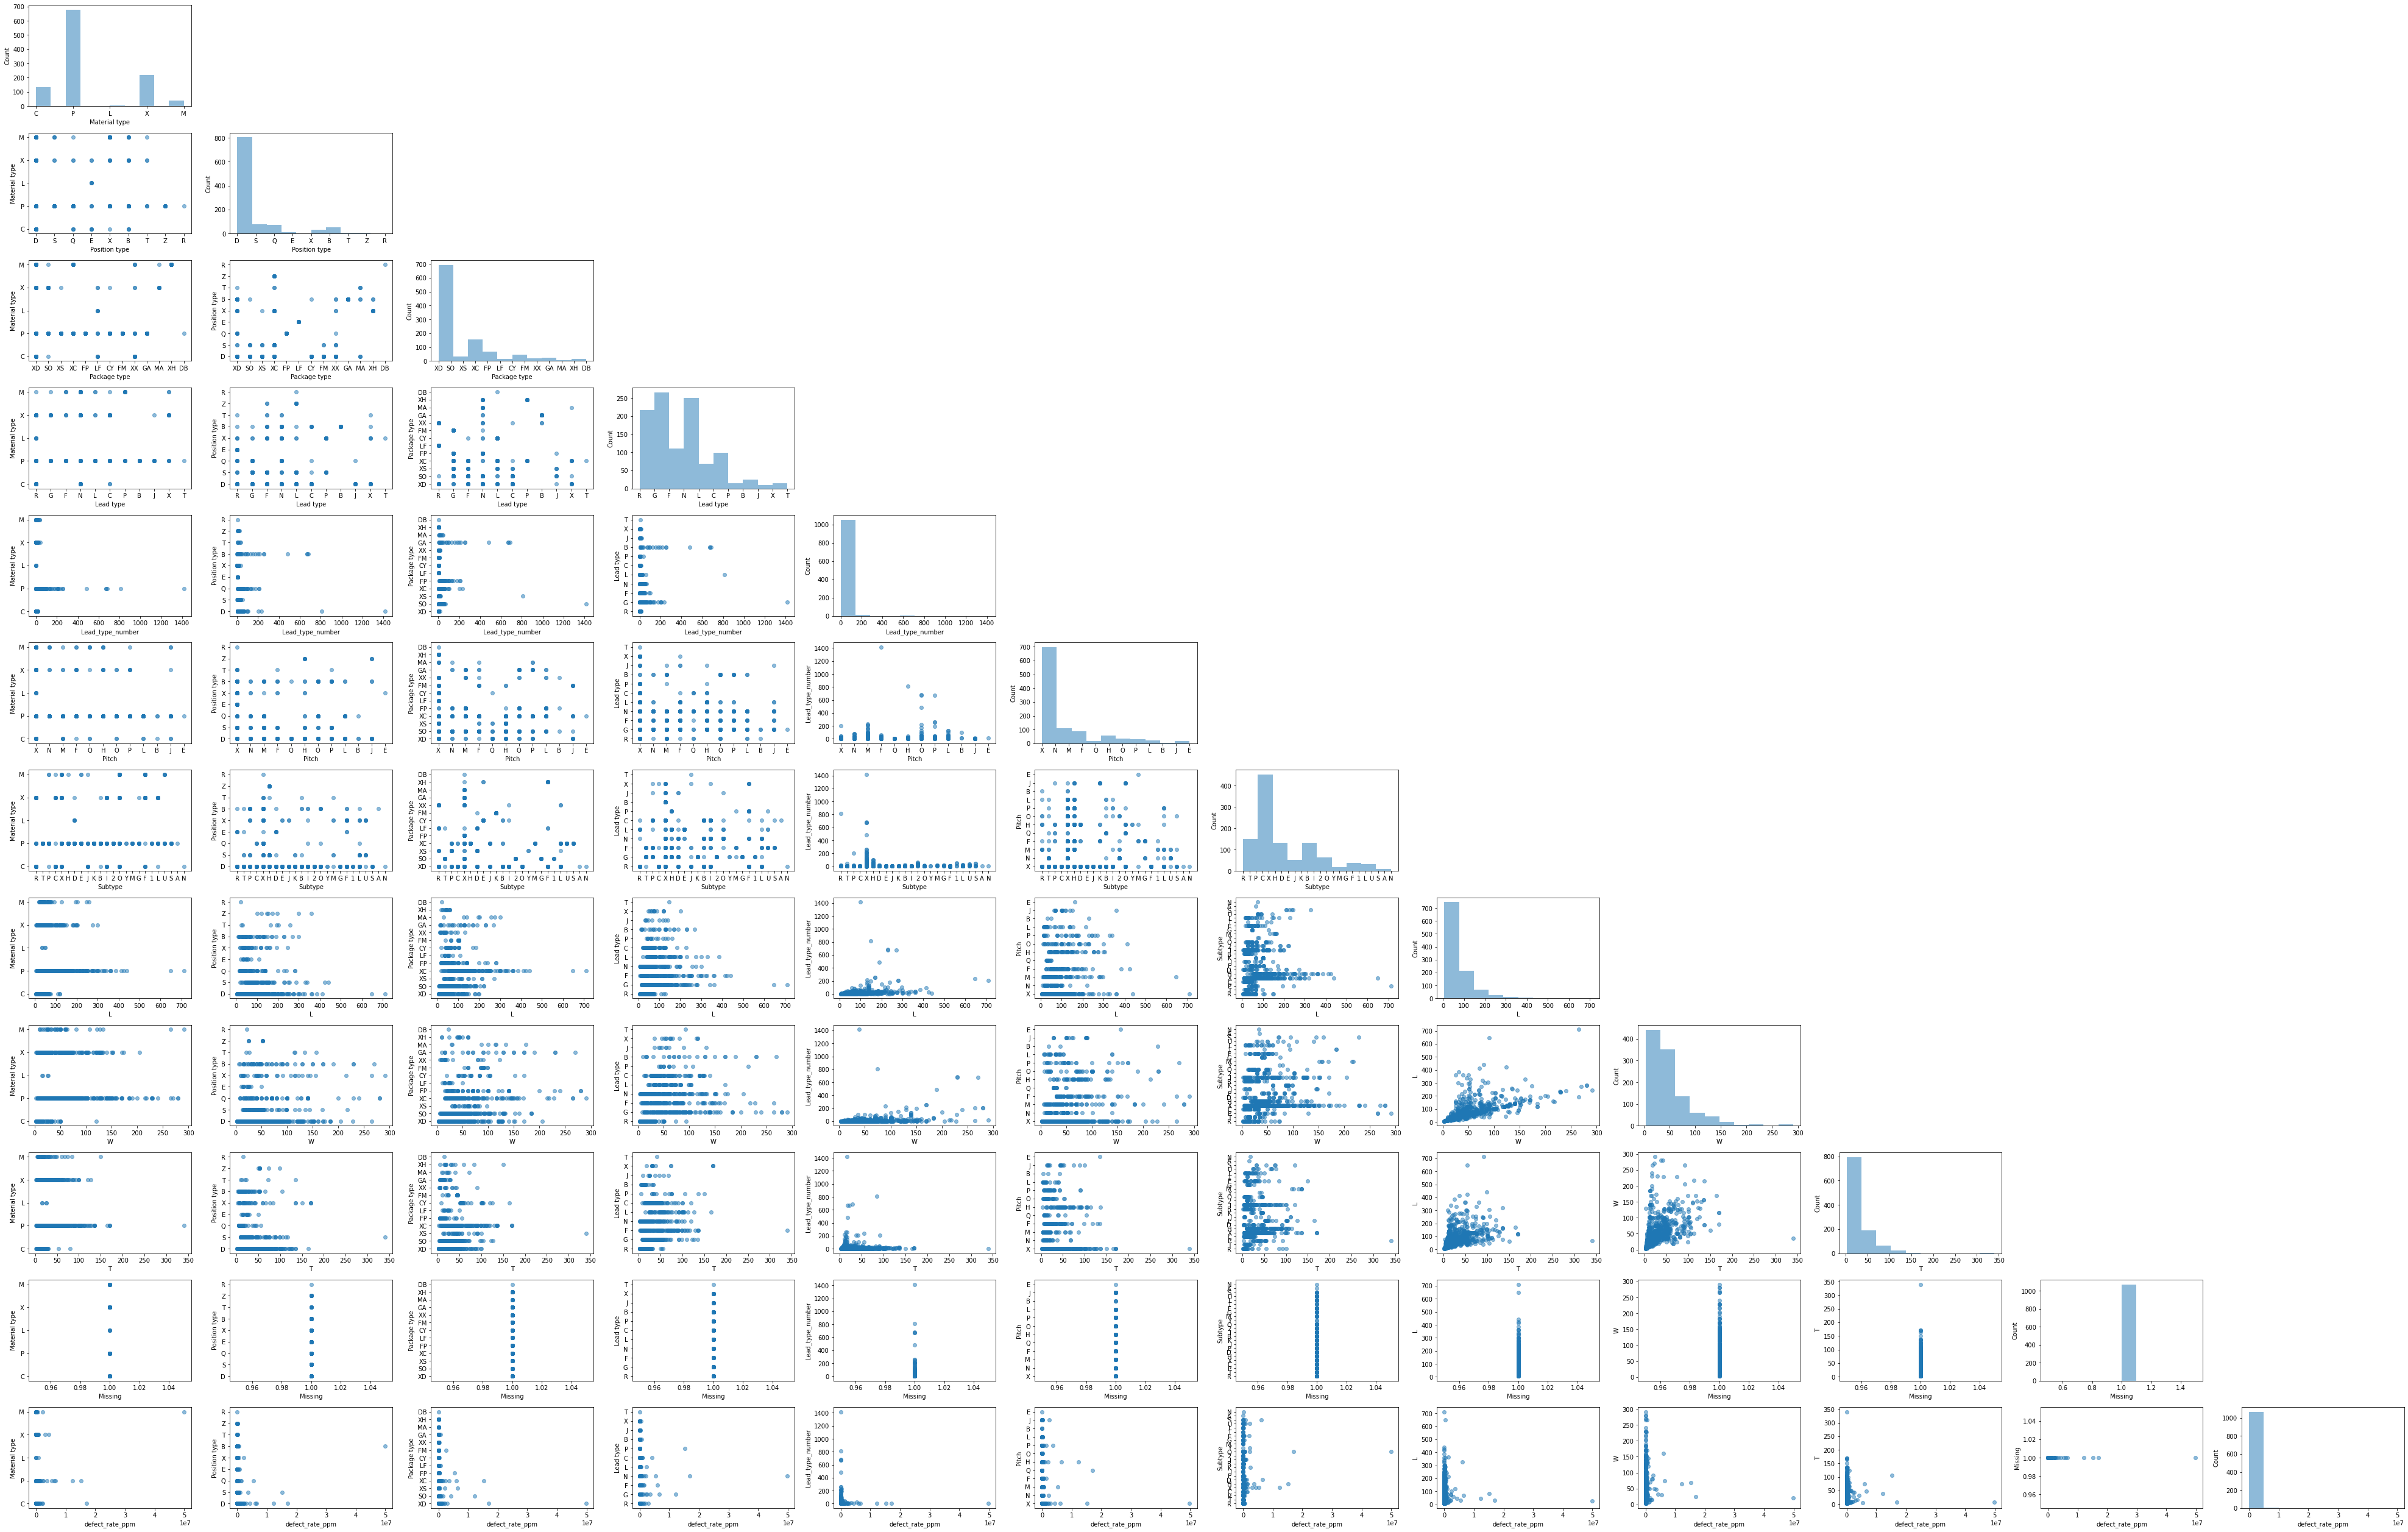

In [18]:
scatterplotmatrix(df_test.values, figsize=(55, 35), names=df_test.columns, alpha=0.5)
plt.tight_layout()
plt.show() 

In [19]:
import numpy as np
from mlxtend.plotting import heatmap

In [22]:
df_heatmap = df_test[["Lead_type_number", "L", "W", "T", "defect_rate_ppm"]]
df_heatmap

,Lead_type_number,L,W,T,defect_rate_ppm
0,2,16,9,5,8251.298294
22,3,29,13,10,2314.025430
41,4,63,83,71,13998.282419
55,2,10,5,4,1295.510386
77,2,16,8,5,820.157994
...,...,...,...,...,...
6732,7,49,59,10,25000.000000
6734,6,20,20,8,16666.666667
6744,2,60,60,28,2415.458937
6745,2,60,60,50,250000.000000


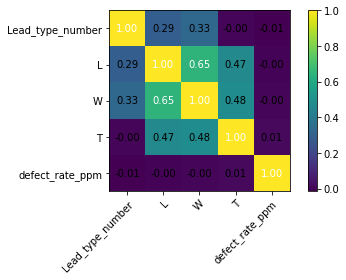

In [23]:
cm = np.corrcoef(df_heatmap.values.T)
hm = heatmap(cm, row_names=df_heatmap.columns, column_names=df_heatmap.columns)
plt.tight_layout()
plt.show()

In [28]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def predict(self, X):
        return self.net_input(X)

In [31]:
X = df_test[["L"]].values
y = df_test["W"].values

In [32]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [33]:
lr = LinearRegressionGD(eta=0.1)

In [34]:
lr.fit(X_std, y_std)

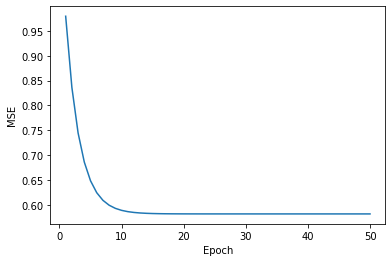

In [35]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [36]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

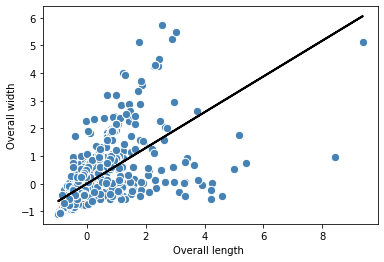

In [38]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Overall length ')
plt.ylabel('Overall width')
plt.show()

In [53]:
# predict the best overall width for an assembly that has as defect type missing
feature_std = sc_x.transform(np.array([[100]]))
print(feature_std)
target_std = lr.predict(feature_std)
print(target_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'overall width: {target_reverted.flatten()[0]}')

[[0.40615921]]
[0.26259417]
overall width: 60.11276159058202


In [54]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [55]:
ransac = RANSACRegressor(estimator=LinearRegression(), 
                         max_trials=100, 
                         min_samples=0.95, 
                         residual_threshold=None, 
                         random_state=123)

In [57]:
X = df_test[["L"]].values
y = df_test["W"].values
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

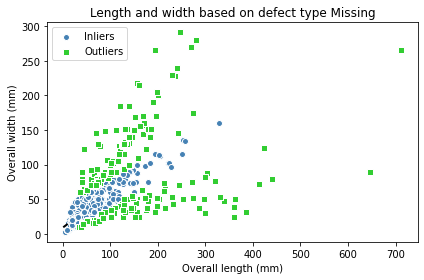

In [59]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
             c='steelblue', edgecolor='white',
             marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Overall length (mm)')
plt.ylabel('Overall width (mm)')
plt.title('Length and width based on defect type Missing')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()